In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [36]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [37]:
#Filtrar base de datos en compradores y no compradores
C=df[df.Purchased==1]
NC=df[df.Purchased==0]

In [38]:
C

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829,Female,32,150000,1
16,15733883,Male,47,25000,1
17,15617482,Male,45,26000,1
18,15704583,Male,46,28000,1
19,15621083,Female,48,29000,1
...,...,...,...,...,...
393,15635893,Male,60,42000,1
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1


In [39]:
NC

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
377,15800215,Female,42,53000,0
380,15683758,Male,42,64000,0
387,15627220,Male,39,71000,0
394,15757632,Female,39,59000,0


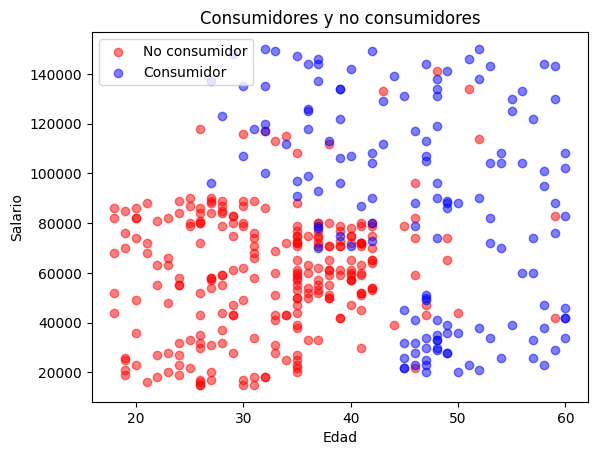

In [40]:
plt.title('Consumidores y no consumidores')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.scatter(NC.Age, NC.EstimatedSalary, color='red',label='No consumidor',alpha=0.5)
plt.scatter(C.Age,C.EstimatedSalary, color='blue',label='Consumidor',alpha=0.5)
plt.legend()
plt.show()

In [41]:
x=df.iloc[:len(df),[2,3]].values
y=df.iloc[:len(df),-1]

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
x_train

array([[    27,  57000],
       [    46,  28000],
       [    39, 134000],
       [    44,  39000],
       [    57,  26000],
       [    32, 120000],
       [    41,  52000],
       [    48,  74000],
       [    26,  86000],
       [    22,  81000],
       [    49,  86000],
       [    36,  54000],
       [    40,  59000],
       [    41,  80000],
       [    26,  16000],
       [    39,  79000],
       [    59, 130000],
       [    42,  64000],
       [    53, 143000],
       [    34, 112000],
       [    57, 122000],
       [    39,  71000],
       [    47,  25000],
       [    24,  19000],
       [    36,  50000],
       [    32, 150000],
       [    48,  29000],
       [    30, 107000],
       [    60,  34000],
       [    38,  61000],
       [    33,  31000],
       [    39,  71000],
       [    55,  39000],
       [    49,  39000],
       [    43, 112000],
       [    27,  20000],
       [    26,  17000],
       [    37,  93000],
       [    42,  54000],
       [    35,  61000],


In [44]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [47]:
from numpy.random.mtrand import logistic
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
y_predict=logistic.predict(x_test)

In [ ]:
x_test

In [49]:
y_predict

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [50]:
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
modelo=sm.Logit(endog=y_train,exog=x_train)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.372821
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      317
Method:                           MLE   Df Model:                            2
Date:                Mon, 14 Aug 2023   Pseudo R-squ.:                  0.4291
Time:                        23:44:54   Log-Likelihood:                -119.30
converged:                       True   LL-Null:                       -208.98
Covariance Type:            nonrobust   LLR p-value:                 1.133e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0391      0.177     -5.860      0.000      -1.387      -0.692
x1             2.1193      0.